In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'5',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'bad896ee-bd08-4ef5-8b4c-db4708c17ea9',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-08-29T13:30:24.961Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 9985}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11654, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11654,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.974674e+07,1.974674e+07,False,NaN,1,None,None,None,2024-08-29T13:29:00.000Z,60257.715141,3.514497e+10,-19.3185,-0.002144,0.697174,-0.999376,-9.571525,-1.902229,-12.340531,1.189893e+12,56.0621,1.265412e+12,None,2024-08-29T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-29 15:30:25.006807
1,1027,Ethereum,ETH,ethereum,9253,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202985e+08,1.202985e+08,True,NaN,2,None,None,None,2024-08-29T13:28:00.000Z,2566.364849,1.660701e+10,-23.8310,-0.002012,1.850474,-2.285698,-23.331387,-24.184193,-32.727418,3.087299e+11,14.5573,3.087299e+11,None,2024-08-29T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-29 15:30:25.006807
2,825,Tether USDt,USDT,tether,95923,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.181046e+11,1.202519e+11,True,NaN,3,None,None,None,2024-08-29T13:28:00.000Z,1.000215,5.878106e+10,-20.0003,-0.001016,0.001334,-0.025076,0.036953,0.199621,0.064065,1.181300e+11,5.5661,1.202778e+11,None,2024-08-29T13:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-29 15:30:25.006807
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459351e+08,1.459351e+08,False,NaN,4,None,None,None,2024-08-29T13:28:00.000Z,543.922300,1.674660e+09,-14.9826,0.006260,0.595358,-6.900299,-5.154176,-5.445622,-8.913842,7.937736e+10,3.7401,7.937736e+10,None,2024-08-29T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-29 15:30:25.006807
4,5426,Solana,SOL,solana,724,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.662709e+08,5.833563e+08,True,NaN,5,None,None,None,2024-08-29T13:28:00.000Z,145.054730,2.414585e+09,-20.9132,-0.484655,-1.377515,1.006726,-20.207710,2.470248,-14.501884,6.763479e+10,3.1866,8.461858e+10,None,2024-08-29T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-29 15:30:25.006807


In [4]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
    'start':'1',
    'limit':'5',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'bad896ee-bd08-4ef5-8b4c-db4708c17ea9',
    }

    session = Session()
    session.headers.update(headers)

    try: 
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile('API.csv'):
        df.to_csv('API.csv', header='column_names')
    else:
        df.to_csv('API.csv', mode='a', header=False)
        
    df = pd.read_csv('API.csv')

    

In [5]:
#for i in range(333):
api_runner()
print('API runner completed')
#sleep(60)
#exit()

{'status': {'timestamp': '2024-08-29T13:30:25.937Z', 'error_code': 0, 'error_message': None, 'elapsed': 317, 'credit_count': 1, 'notice': None, 'total_count': 9985}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11654, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [7]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.38596,0.91572,-0.73663,-9.48115,-1.67167,-12.08477
Ethereum,0.51126,1.98052,-1.96913,-23.33655,-23.96992,-32.61030
Tether USDt,-0.00740,-0.04053,-0.01825,0.02306,0.19450,0.04757
BNB,0.09426,0.69282,-6.37174,-5.08309,-5.20002,-8.82877
Solana,-0.00413,-1.12324,1.61683,-20.02371,2.98249,-14.36705


In [8]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.38596
             quote.USD.percent_change_24h     0.91572
             quote.USD.percent_change_7d     -0.73663
             quote.USD.percent_change_30d    -9.48115
             quote.USD.percent_change_60d    -1.67167
             quote.USD.percent_change_90d   -12.08477
Ethereum     quote.USD.percent_change_1h      0.51126
             quote.USD.percent_change_24h     1.98052
             quote.USD.percent_change_7d     -1.96913
             quote.USD.percent_change_30d   -23.33655
             quote.USD.percent_change_60d   -23.96992
             quote.USD.percent_change_90d   -32.61030
Tether USDt  quote.USD.percent_change_1h     -0.00740
             quote.USD.percent_change_24h    -0.04053
             quote.USD.percent_change_7d     -0.01825
             quote.USD.percent_change_30d     0.02306
             quote.USD.percent_change_60d     0.19450
             quote.USD.percent_change_90

In [9]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.38596
            quote.USD.percent_change_24h   0.91572
            quote.USD.percent_change_7d   -0.73663
            quote.USD.percent_change_30d  -9.48115
            quote.USD.percent_change_60d  -1.67167
            quote.USD.percent_change_90d -12.08477
Ethereum    quote.USD.percent_change_1h    0.51126
            quote.USD.percent_change_24h   1.98052
            quote.USD.percent_change_7d   -1.96913
            quote.USD.percent_change_30d -23.33655
            quote.USD.percent_change_60d -23.96992
            quote.USD.percent_change_90d -32.61030
Tether USDt quote.USD.percent_change_1h   -0.00740
            quote.USD.percent_change_24h  -0.04053
            quote.USD.percent_change_7d   -0.01825
            quote.USD.percent_change_30d   0.02306
            quote.USD.percent_change_60d   0.19450
            quote.USD.percent_change_90d   0.04757
BNB         quote.USD.percent_change_1h    0.09426
            quote.USD.percent_change_24h   0.69282
            quote.USD.percent_change_7d   -6.37174
            quote.USD.percent_change_30d  -5.08309
            quote.USD.percent_change_60d  -5.20002
            quote.USD.percent_change_90d  -8.82877
Solana      quote.USD.percent_change_1h   -0.00413
            quote.USD.percent_change_24h  -1.12324
            quote.USD.percent_change_7d    1.61683
            quote.USD.percent_change_30d -20.02371
            quote.USD.percent_change_60d   2.98249
            quote.USD.percent_change_90d -14.36705

In [10]:
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.38596
1,Bitcoin,quote.USD.percent_change_24h,0.91572
2,Bitcoin,quote.USD.percent_change_7d,-0.73663
3,Bitcoin,quote.USD.percent_change_30d,-9.48115
4,Bitcoin,quote.USD.percent_change_60d,-1.67167
5,Bitcoin,quote.USD.percent_change_90d,-12.08477
6,Ethereum,quote.USD.percent_change_1h,0.51126
7,Ethereum,quote.USD.percent_change_24h,1.98052
8,Ethereum,quote.USD.percent_change_7d,-1.96913
9,Ethereum,quote.USD.percent_change_30d,-23.33655


In [11]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.38596
1,Bitcoin,quote.USD.percent_change_24h,0.91572
2,Bitcoin,quote.USD.percent_change_7d,-0.73663
3,Bitcoin,quote.USD.percent_change_30d,-9.48115
4,Bitcoin,quote.USD.percent_change_60d,-1.67167
5,Bitcoin,quote.USD.percent_change_90d,-12.08477
6,Ethereum,quote.USD.percent_change_1h,0.51126
7,Ethereum,quote.USD.percent_change_24h,1.98052
8,Ethereum,quote.USD.percent_change_7d,-1.96913
9,Ethereum,quote.USD.percent_change_30d,-23.33655


In [12]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.38596
1,Bitcoin,24h,0.91572
2,Bitcoin,7d,-0.73663
3,Bitcoin,30d,-9.48115
4,Bitcoin,60d,-1.67167
5,Bitcoin,90d,-12.08477
6,Ethereum,1h,0.51126
7,Ethereum,24h,1.98052
8,Ethereum,7d,-1.96913
9,Ethereum,30d,-23.33655


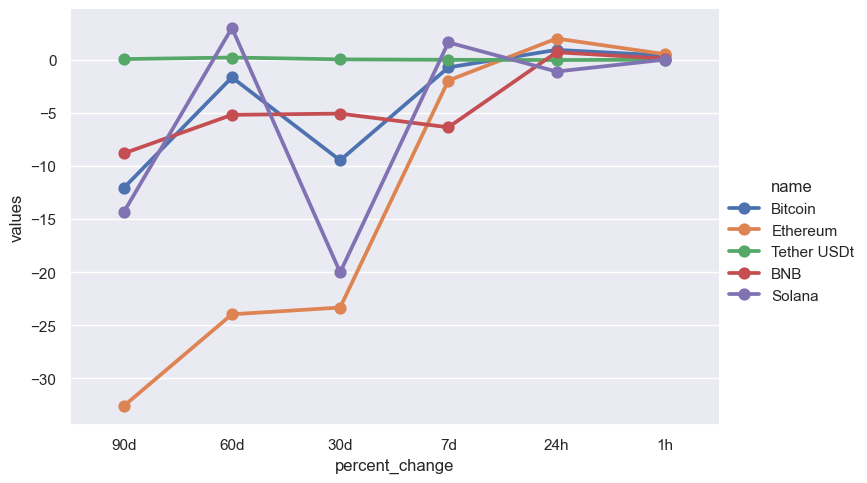

In [19]:
order = ['90d', '60d', '30d', '7d', '24h', '1h']
df7['percent_change'] = pd.Categorical(df7['percent_change'], categories=order, ordered=True)

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point',order=order, aspect=1.5)

In [14]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,60392.51173,2024-08-29 15:12:59.505899
5,Bitcoin,60407.84310,2024-08-29 15:14:44.668510
10,Bitcoin,60407.84310,2024-08-29 15:15:17.806086
15,Bitcoin,60407.84310,2024-08-29 15:15:27.315864
20,Bitcoin,60257.71514,2024-08-29 15:30:26.330831


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

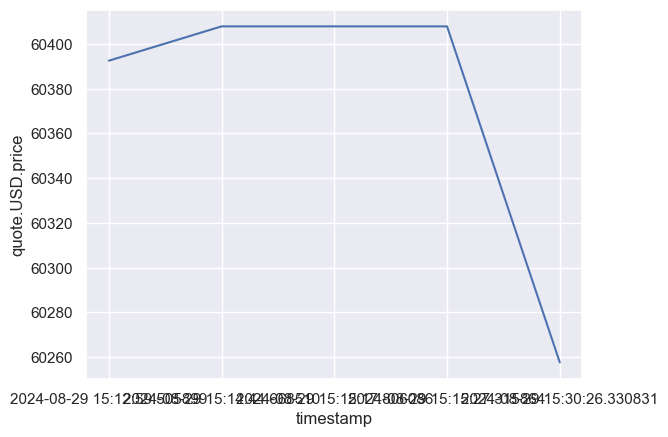

In [17]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)